# import data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error

C:\Users\Home\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train=pd.read_excel(r"C:\Users\Home\Downloads\train.xlsx")
test=pd.read_excel(r"C:\Users\Home\Downloads\test.xlsx")

In [3]:
train.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1,188,Feed,clay,1,0,0.0,0,1,0
1,2,209,Feed,clay,1,0,0.0,0,2,1
2,3,257,Feed,clay,1,0,0.0,0,2,1
3,4,257,Feed,silt,1,0,0.0,0,2,1
4,5,342,Feed,clay,1,0,0.0,0,2,1


In [4]:
train.shape

(80000, 10)

In [5]:
test.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season
0,1,188,Feed,silt,1,0,NaN,0,2
1,2,410,Feed,silt,1,0,0.0,0,2
2,3,626,Feed,clay,1,0,0.0,0,2
3,4,731,Feed,clay,1,0,0.0,0,2
4,5,789,Food,clay,1,0,0.0,0,1


In [6]:
test.shape

(35000, 9)

In [7]:
df=pd.concat([train,test])

In [8]:
df.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1,188,Feed,clay,1,0,0.0,0,1,0.0
1,2,209,Feed,clay,1,0,0.0,0,2,1.0
2,3,257,Feed,clay,1,0,0.0,0,2,1.0
3,4,257,Feed,silt,1,0,0.0,0,2,1.0
4,5,342,Feed,clay,1,0,0.0,0,2,1.0


In [9]:
df.shape

(115000, 10)

In [10]:
df.describe()

,ID,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
count,115000.000000,115000.000000,115000.000000,115000.000000,103403.000000,115000.000000,115000.000000,80000.000000
mean,33152.673913,1398.193104,2.267870,25.855783,28.698316,9.508243,1.898374,0.192312
std,22567.036282,849.695508,0.464341,15.550645,12.428972,9.879788,0.701959,0.455912
min,1.000000,150.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,14375.750000,731.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,28750.500000,1212.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,51250.250000,1898.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,80000.000000,4097.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115000 entries, 0 to 34999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          115000 non-null  int64  
 1   Insects                     115000 non-null  int64  
 2   Crop                        115000 non-null  object 
 3   Soil                        115000 non-null  object 
 4   Category_of_Toxicant        115000 non-null  int64  
 5   Does_count                  115000 non-null  int64  
 6   Number_of_Weeks_Used        103403 non-null  float64
 7   Number_Weeks_does_not used  115000 non-null  int64  
 8   Season                      115000 non-null  int64  
 9   Crop_status                 80000 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 9.7+ MB


In [12]:
df.isnull().sum()

ID                                0
Insects                           0
Crop                              0
Soil                              0
Category_of_Toxicant              0
Does_count                        0
Number_of_Weeks_Used          11597
Number_Weeks_does_not used        0
Season                            0
Crop_status                   35000
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1,188,Feed,clay,1,0,0.0,0,1,0.0
1,2,209,Feed,clay,1,0,0.0,0,2,1.0
2,3,257,Feed,clay,1,0,0.0,0,2,1.0
3,4,257,Feed,silt,1,0,0.0,0,2,1.0
4,5,342,Feed,clay,1,0,0.0,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...
79995,79996,209,Food,silt,2,20,12.0,6,2,0.0
79996,79997,232,Food,silt,2,20,12.0,9,1,0.0
79997,79998,256,Food,silt,2,10,14.0,10,1,0.0
79998,79999,256,Food,silt,2,10,16.0,8,2,0.0


In [15]:
df.shape

(71945, 10)

In [16]:
df.Soil.unique()

array(['clay', 'silt'], dtype=object)

In [17]:
df.Crop.unique()

array(['Feed', 'Food'], dtype=object)

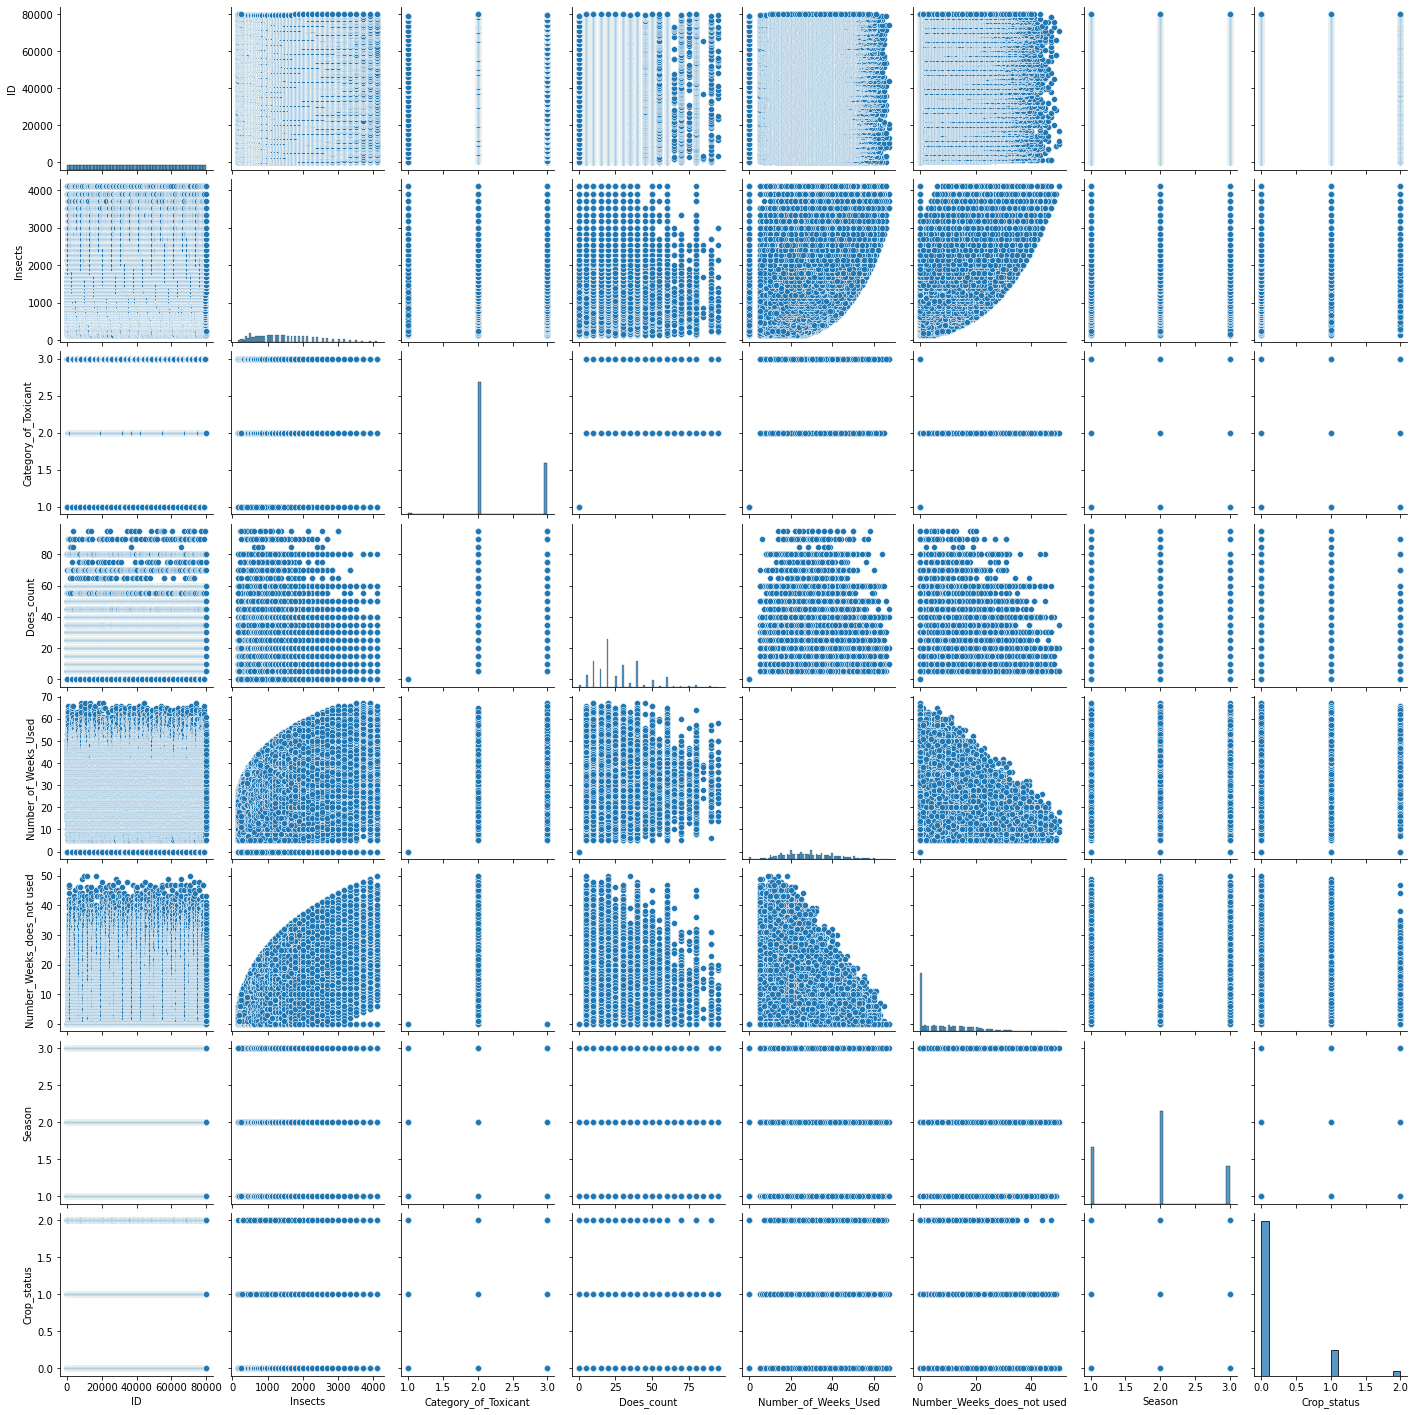

In [18]:
sns.pairplot(df)

In [19]:
df.corr()

,ID,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
ID,1.000000,0.003306,-0.005685,-0.005607,-0.005128,0.004623,-0.006833,-0.000748
Insects,0.003306,1.000000,-0.081097,-0.100335,0.435935,0.298390,0.003309,0.204804
Category_of_Toxicant,-0.005685,-0.081097,1.000000,-0.004086,0.343883,-0.557443,0.001132,0.174664
Does_count,-0.005607,-0.100335,-0.004086,1.000000,0.123933,-0.033645,-0.001348,-0.030574
Number_of_Weeks_Used,-0.005128,0.435935,0.343883,0.123933,1.000000,-0.447572,0.001971,0.233523
Number_Weeks_does_not used,0.004623,0.298390,-0.557443,-0.033645,-0.447572,1.000000,0.003445,-0.133100
Season,-0.006833,0.003309,0.001132,-0.001348,0.001971,0.003445,1.000000,-0.001167
Crop_status,-0.000748,0.204804,0.174664,-0.030574,0.233523,-0.133100,-0.001167,1.000000


<AxesSubplot:>

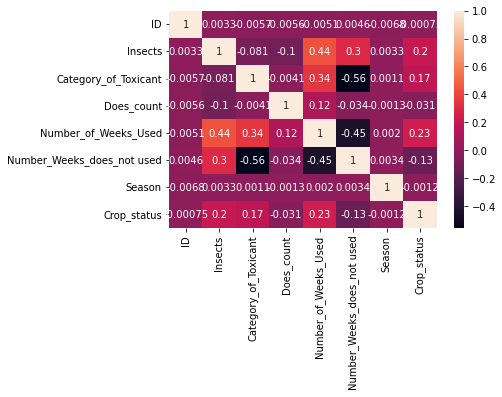

In [20]:
sns.heatmap(df.corr(), annot =True)

# dummy values

In [21]:
dummy = pd.get_dummies(df)

In [22]:
dummy

,ID,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status,Crop_Feed,Crop_Food,Soil_clay,Soil_silt
0,1,188,1,0,0.0,0,1,0.0,1,0,1,0
1,2,209,1,0,0.0,0,2,1.0,1,0,1,0
2,3,257,1,0,0.0,0,2,1.0,1,0,1,0
3,4,257,1,0,0.0,0,2,1.0,1,0,0,1
4,5,342,1,0,0.0,0,2,1.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79996,209,2,20,12.0,6,2,0.0,0,1,0,1
79996,79997,232,2,20,12.0,9,1,0.0,0,1,0,1
79997,79998,256,2,10,14.0,10,1,0.0,0,1,0,1
79998,79999,256,2,10,16.0,8,2,0.0,0,1,0,1


In [23]:
x = dummy.drop(["Insects","Crop_status","Does_count"], axis=1)
y = dummy["Crop_status"]

In [24]:
x

,ID,Category_of_Toxicant,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_Feed,Crop_Food,Soil_clay,Soil_silt
0,1,1,0.0,0,1,1,0,1,0
1,2,1,0.0,0,2,1,0,1,0
2,3,1,0.0,0,2,1,0,1,0
3,4,1,0.0,0,2,1,0,0,1
4,5,1,0.0,0,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...
79995,79996,2,12.0,6,2,0,1,0,1
79996,79997,2,12.0,9,1,0,1,0,1
79997,79998,2,14.0,10,1,0,1,0,1
79998,79999,2,16.0,8,2,0,1,0,1


In [25]:
y

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
79995    0.0
79996    0.0
79997    0.0
79998    0.0
79999    0.0
Name: Crop_status, Length: 71945, dtype: float64

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (53958, 9)
x_test : (17987, 9)
y_train : (53958,)
y_test : (17987,)


# Linear Regression

In [27]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
lr_predict = model.predict(x_test)

In [29]:
lr_predict

array([0.09178257, 0.29507055, 0.27630599, ..., 0.20005613, 0.11774409,
       0.43175619])

In [30]:
model.score(x_test,y_test)

0.07411173167664353

In [31]:
from sklearn.metrics import r2_score

In [32]:
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.07411173167664353


Text(0.5, 1.0, 'Linear Regression')

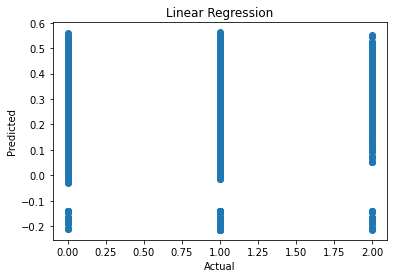

In [33]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination.

# Random Forest Algorithm

In [34]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=11)

In [35]:
rf_predict = model.predict(x_test)

In [36]:
rf_predict

array([0.18181818, 0.        , 0.        , ..., 0.09090909, 0.09090909,
       0.36363636])

In [37]:
model.score(x_test,y_test)

-0.027286077710652945

In [38]:
from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  -0.027286077710652945


In [39]:
Adjr2_1 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.07364819524593147


C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Random Forest Regression')

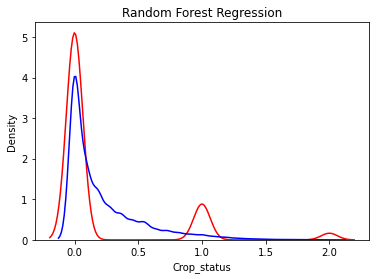

In [40]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

# Decision Tree

In [41]:
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([0., 0., 0., ..., 0., 0., 1.])

In [42]:
regressor.score(x_test,y_test)

-0.6950865346868995

In [43]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  -0.6950865346868995


In [44]:
Adjr2_2 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : 0.07364819524593147


C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Home\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Decision Tree Regression')

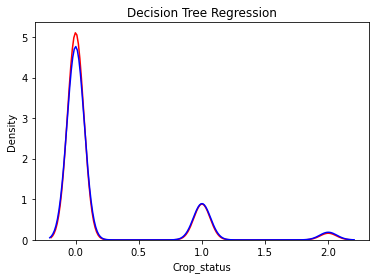

In [45]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(decisiontree_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Decision Tree Regression')

# Cross-validation

In [46]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y=y_train, cv = 10)

In [47]:
a1 = (accuracies.mean()*100)
b1 = (accuracies.std()*100)

In [48]:
print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : -1.84%
Standard Deviation : 2.59%


# Cross-validation

In [50]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train, y=y_train)

In [51]:
a2 = (accuracies.mean()*100)
b2 = (accuracies.std()*100)

In [52]:
print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : -68.00%
Standard Deviation : 4.35%


Text(0.5, 0, 'Machine Learning Regression Techniques')

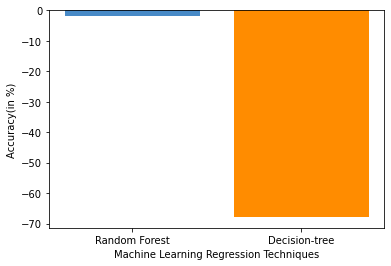

In [53]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [a1, a2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Regression Techniques')

Text(0.5, 0, 'Machine Learning Regression Techniques')

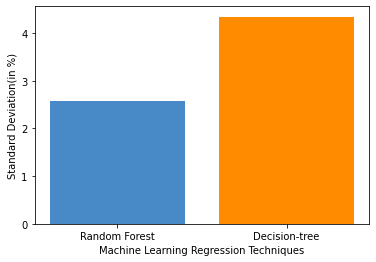

In [54]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [b1, b2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

Text(0.5, 0, 'Machine Learning Regression Techniques')

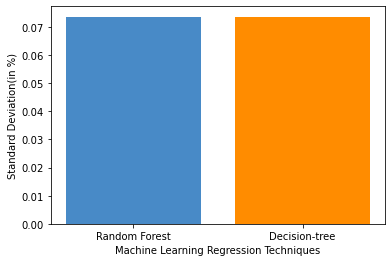

In [55]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [Adjr2_1, Adjr2_2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

In [60]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(rf_predict,y_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))

Mean Absolute Error: 0.2764117519218425
Mean Squared Error: 0.21732040633570526
Root Mean Squared Error: 0.4661763682724654
